# Drake Passage Transport

In [14]:
import os
import sys
sys.path.insert(1,'/glade/u/home/yhoussam/analysis/mom6_diagnostics')
from analysis_mom6 import *
import matplotlib.pyplot as plt
import cmocean
from cartopy import crs as ccrs
from tqdm import tqdm
import colorcet as cc
from collections import OrderedDict
import pandas as pd

data_path = '/glade/u/home/yhoussam/analysis/simulations/data/'
def return_ncfile_path(analysis_dir,sim,file):
    nc_dir = os.path.join(analysis_dir,sim)
    nc_dir = os.path.join(nc_dir,'ncfiles')
    file_name = sim+'_'+file+'.nc'
    path =  os.path.join(nc_dir,file_name)
    return path


import warnings
from xarray.coding.times import SerializationWarning

warnings.filterwarnings(
    "ignore",
    "Unable to decode time axis into full numpy.datetime64 objects",
    category=SerializationWarning
)


save_path = 'png/'
import matplotlib as mpl
mpl.rcParams['font.size'] = 20

import matplotlib.pyplot as plt
import matplotlib as mpl

mpl.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Computer Modern Roman"],
})

In [15]:
case_names = ['gmom.e23.GJRAv3.TL319_t025_hycom1_N75.tx1_4.smag_control.003',
              'gmom.e23.GJRAv3.TL319_t025_hycom1_N75.tx1_4.MEKE_GM.004',
              'gmom.e23.GJRAv3.TL319_t025_hycom1_N75.tx1_4.MEKE_GM.007',
              'gmom.e23.GJRAv3.TL319_t025_hycom1_N75.tx1_4.leith_GM.028'
              ]
snames = ['REF','GM','GM+MBK','GM+LBK']

c = np.array([[39, 97, 184],  # Blue
              [99, 173, 111],   # Green
              [219, 93, 79],   # Red
              [154, 109, 232],  # Purple
              [255, 200, 61] ],  # Yellow], 
             dtype=np.float64) / 255.0  # Normalize to 0-1 scale

loc = 'archive'
sims = []
for i in range(len(snames)):
    sim = MOM6_simulation(snames[i],case_names[i],loc=loc)
    sims.append(sim)

num_sims = len(sims)


analysis_dir = '/glade/work/yhoussam/analysis_mom6/backscatter/61years/'
file = 'section_transports'

paths=[]
for i in range(num_sims):
    ad = analysis_dir 
    case_name = case_names[i]
    path = return_ncfile_path(ad,case_name,file)
    paths.append(path)



sims = [] 
for i in range(num_sims):
    sim = MOM6_simulation(snames[i],case_names[i],'archive')
    sim.open_ncfile(paths[i])
    #sim.grid_path = grid_path
    #sim.open_grid()
    sims.append(sim)


Opened file.
Opened file.
Opened file.
Opened file.


In [16]:
import cftime
time_numeric_long = cftime.date2num(sims[0].ds.time, units="common_years since 0000-01-01")
time_numeric_short = cftime.date2num(sims[2].ds.time, units="common_years since 0000-01-01")

i=0
sim = sims[i]
sec  =  4 # Drake passage

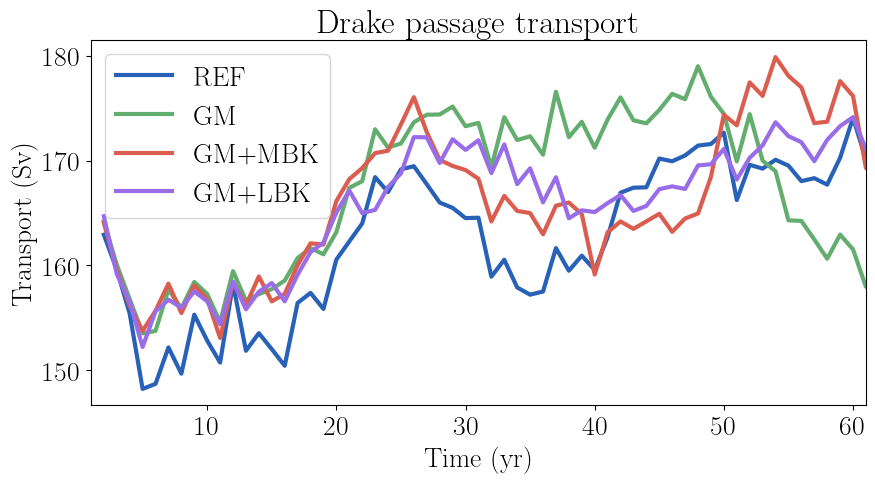

In [17]:
lw = 3.

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)


ax.plot(time_numeric_long,  sims[0].ds.transport[sec],c=c[0],lw=lw,label=sims[0].short_name)
ax.plot(time_numeric_long,  sims[1].ds.transport[sec],c=c[1],lw=lw,label=sims[1].short_name)
ax.plot(time_numeric_short, sims[2].ds.transport[sec],c=c[2],lw=lw,label=sims[2].short_name)
ax.plot(time_numeric_short, sims[3].ds.transport[sec],c=c[3],lw=lw,label=sims[3].short_name)

ax.set_xlabel('Time (yr)')
ax.set_ylabel('Transport (Sv)')

title = "Drake passage transport"
ax.set_title(title)

ax.set_xlim([1,61])
ax.legend();

plt.subplots_adjust(bottom=0.15)

plt.savefig(save_path+title+'_legend.png',dpi=300)

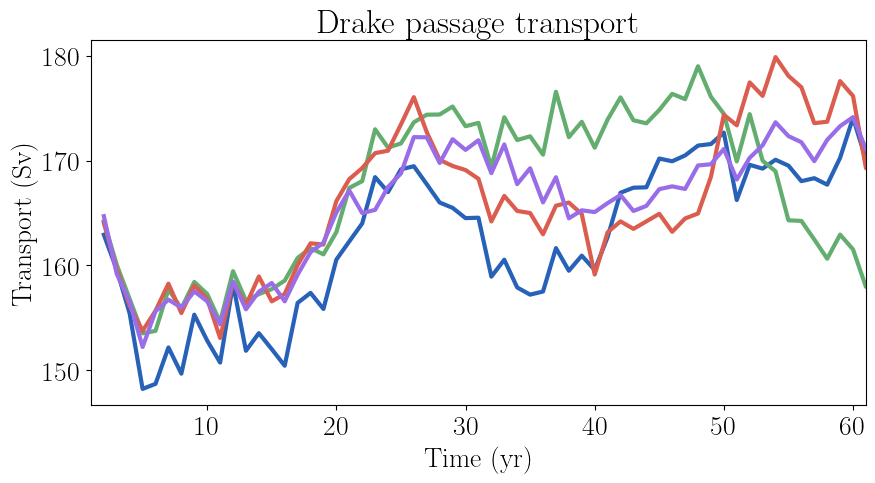

In [18]:
lw = 3.

fig = plt.figure(figsize=(10,5))
ax = plt.subplot(111)


ax.plot(time_numeric_long,  sims[0].ds.transport[sec],c=c[0],lw=lw,label=sims[0].short_name)
ax.plot(time_numeric_long,  sims[1].ds.transport[sec],c=c[1],lw=lw,label=sims[1].short_name)
ax.plot(time_numeric_short, sims[2].ds.transport[sec],c=c[2],lw=lw,label=sims[2].short_name)
ax.plot(time_numeric_short, sims[3].ds.transport[sec],c=c[3],lw=lw,label=sims[3].short_name)

ax.set_xlabel('Time (yr)')
ax.set_ylabel('Transport (Sv)')

title = "Drake passage transport"
ax.set_title(title)

ax.set_xlim([1,61])
#ax.legend();

plt.subplots_adjust(bottom=0.15)

plt.savefig(save_path+title+'_no_legend.png',dpi=300)